# Demonstration of pyQ3 python wrapper for DEW-ENKI-EQ3-EQ6 aqueous speciation calculations - TUTORIAL 4

First import the required packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyQ3

In [2]:
dew_system = pyQ3.System()

In [3]:
molalities = {'NA+':0.05,
              'CL-':0.05}
mineral_eq = {'H4SIO4(AQ)':'QUARTZ_ALPHA',
              'MG+2':['OLIVINE(SS)','FORSTERITE'],
              'FE+2':['OLIVINE(SS)','FAYALITE']}
solid_solutions = {'OLIVINE(SS)':{'FORSTERITE':0.9, 'FAYALITE':0.1}}
T = 350.0 + 273.15
P = 10000.0

In [4]:
dew_fluid = pyQ3.Fluid(dew_system, T, P, molalities=molalities, mineral_eq=mineral_eq, solid_solutions=solid_solutions, uacion='NA+')

/Users/simonmatthews/opt/anaconda3/lib/python3.7/site-packages/pyQ3/output.py:150: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ss_info = pd.Series()


In [5]:
reactants = [{'reactant': 'FORSTERITE',
              'moles': 1.0}]
dew_reaction = pyQ3.Reaction(dew_fluid, T, P, reactants)

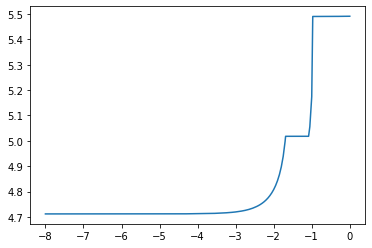

In [7]:
f,a = plt.subplots()
a.plot(dew_reaction.logzi[1:], dew_reaction.pH[1:])
plt.show()

In [8]:
dew_reaction.species_concs

,H2O,H+,H4SIO4(AQ),CL-,FE+2,MG+2,NA+,O2(G),FE(OH)+,FECL+,...,FE(OH)3-,H3SIO4-,MG(H3SIO4)+,MGCL+,MG(OH)+,NACL(AQ),NAOH(AQ),OH-,H6SI2O7(AQ),H8SI3O10(AQ)
-999.00,-6,-4.60867,-1.47019,-1.30592,-5.9611,-3.70613,-1.30575,-6,-6,-6,...,-6,-3.74547,-5.59962,-4.57457,-4.73799,-3.27523,-5.07184,-3.51104,-2.32293,-6
-7.90,-6,-4.60867,-1.47020,-1.30592,-5.9611,-3.70613,-1.30575,-6,-6,-6,...,-6,-3.74547,-5.59962,-4.57457,-4.73799,-3.27523,-5.07184,-3.51104,-2.32293,-6
-6.55,-6,-4.60867,-1.47020,-1.30592,-5.9611,-3.70613,-1.30575,-6,-6,-6,...,-6,-3.74547,-5.59962,-4.57457,-4.73799,-3.27523,-5.07184,-3.51103,-2.32293,-6
-6.40,-6,-4.60867,-1.47020,-1.30592,-5.9611,-3.70613,-1.30575,-6,-6,-6,...,-6,-3.74547,-5.59962,-4.57457,-4.73799,-3.27523,-5.07184,-3.51103,-2.32294,-6
-6.25,-6,-4.60867,-1.47020,-1.30592,-5.9611,-3.70613,-1.30575,-6,-6,-6,...,-6,-3.74547,-5.59962,-4.57457,-4.73798,-3.27523,-5.07184,-3.51103,-2.32294,-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-0.20,-6,-5.38566,-3.89872,-1.29984,-6.0000,-3.16872,-1.29949,-6,-6,-6,...,-6,-5.39300,-6.00000,-4.03907,-3.42759,-3.26688,-4.28860,-2.73006,-6.00000,-6
-0.15,-6,-5.38567,-3.89872,-1.29893,-6.0000,-3.16856,-1.29858,-6,-6,-6,...,-6,-5.39284,-6.00000,-4.03832,-3.42759,-3.26522,-4.28769,-2.72990,-6.00000,-6
-0.10,-6,-5.38567,-3.89873,-1.29790,-6.0000,-3.16838,-1.29756,-6,-6,-6,...,-6,-5.39266,-6.00000,-4.03748,-3.42759,-3.26336,-4.28667,-2.72971,-6.00000,-6
-0.05,-6,-5.38568,-3.89873,-1.29675,-6.0000,-3.16818,-1.29640,-6,-6,-6,...,-6,-5.39245,-6.00000,-4.03654,-3.42759,-3.26126,-4.28551,-2.72950,-6.00000,-6


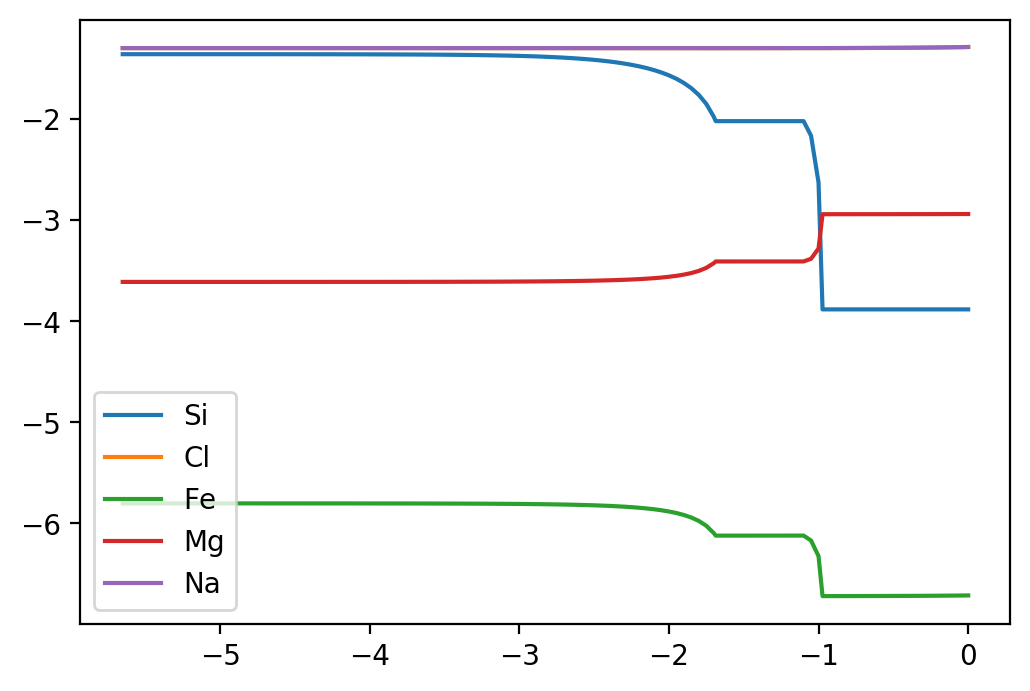

In [17]:
f,a = plt.subplots(dpi=200)
for el in list(dew_reaction.elements.columns):
    a.plot(dew_reaction.elements.index[1:], dew_reaction.elements[el].iloc[1:], label=el)
a.legend()
plt.show()

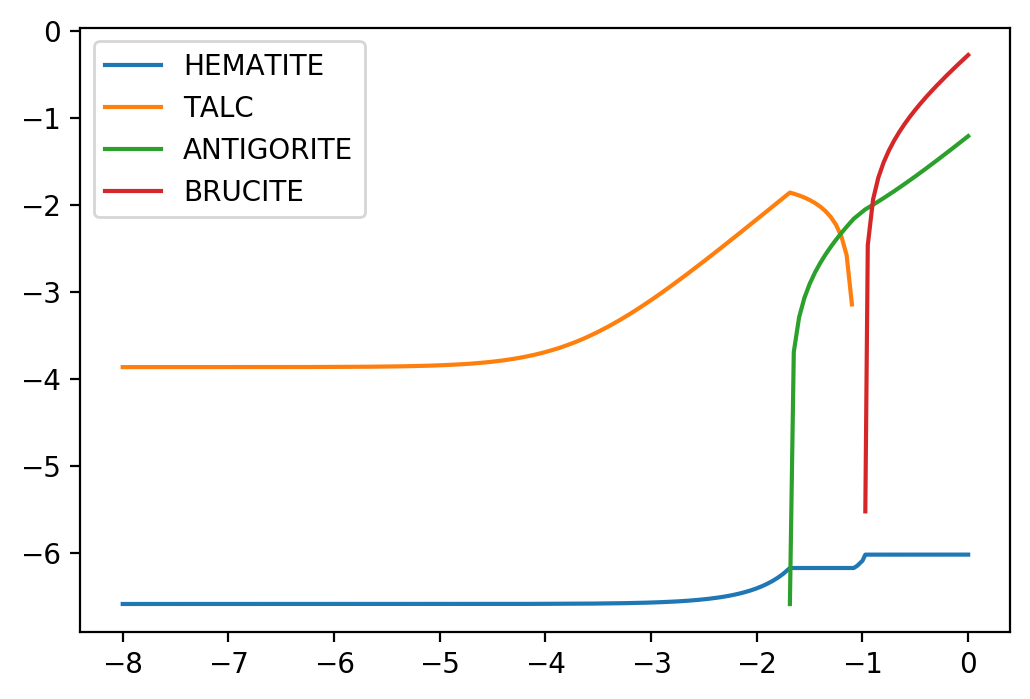

In [18]:
f,a = plt.subplots(dpi=200)
for mi in list(dew_reaction.minerals.columns):
    a.plot(dew_reaction.minerals.index[1:], dew_reaction.minerals[mi].iloc[1:], label=mi)
a.legend()
plt.show()

In [11]:
el

'Si'